#**A Inteligência Artificial aplicada para o estudo da mortalidade infantil e sua relação com o saneamento básico no Brasil.**
---


> Leonardo Silva Pinto **RA:** 133732

> Maria Paula Henriques Prandt **RA**:148153



## Pré processamento - Extração e tratamento dos dados

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz
import graphviz
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans


Para a realização do projeto utilizamos do Colab, então para isso precisamos montar o drive para acessar os arquivos

In [ ]:
# Conexão com o google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Extraindo dados dos municipios
data_city = pd.read_excel('/content/drive/MyDrive/Projeto IA/REGISTRO_ADMINISTRATIVO_TOTAL_2012_A_2017.xlsx', sheet_name='municipio')

In [ ]:
data_city.head()

,ANO,DESAGREGACAO,IBGE7,NOME,PMATPUB_EF,PMATPUB_EM,PMATPRI_EF,PMATPRI_EM,DIST_EF_TOTAL,DIST_EM_TOTAL,...,SNIS_CDI,PFOCOS,PFLORA,PFEM_VEREADOR,PFEM_PREFEITO,PFEM_GOVERNADOR,PFEM_DEP_ESTADUAL,PFEM_DEP_FEDERAL,PFEM_SENADOR,POP_TOT
0,2013,TOTAL,1100015,Alta Floresta D&apos;Oeste,99.26,100.00,0.74,NaN,25.8,29.6,...,100.0,0.51,66.02,20.00,0.0,NaN,NaN,NaN,NaN,25728
1,2013,TOTAL,1100023,Ariquemes,91.12,94.80,8.88,5.20,24.5,27.1,...,100.0,0.49,34.67,7.69,0.0,NaN,NaN,NaN,NaN,101269
2,2013,TOTAL,1100031,Cabixi,100.00,100.00,NaN,NaN,18.1,18.7,...,100.0,0.13,32.01,11.11,0.0,NaN,NaN,NaN,NaN,6495
3,2013,TOTAL,1100049,Cacoal,85.55,82.90,14.45,17.10,19.3,24.6,...,100.0,0.13,37.07,8.33,0.0,NaN,NaN,NaN,NaN,85863
4,2013,TOTAL,1100056,Cerejeiras,97.18,97.47,2.82,2.53,21.1,21.1,...,NaN,0.19,63.12,0.00,0.0,NaN,NaN,NaN,NaN,18041


Com auxilio de um especialista, foram defidos o uso dos seguintes atributos:
- Ano
- Nome da Cidade
- PINTERDRSAI (Percentual de internações por doenças relacionadas ao saneamento ambiental inadequado)
- SNIS_PAGUA (Percentual da população urbana residentes em domicílios ligados a rede de abastecimento de água)
- SNIS_PESGOTO (Percentual da população urbana residente em domicílios ligados à rede de esgotamento sanitário)
- SNIS_PESGTRA (Percentual de esgoto tratado)
- TXMOINF (Taxa de Mortalidade Infantil)
- PDEFSAN (Percentual de pessoas inscritas no Cadastro Único sem esgotamento sanitário adequado)
- TTREVA_EF_TOTAL (Taxa de evasão no ensino fundamental)
- TTREVA_EM_TOTAL (Taxa de evasão no ensino médio)
- DOCSUP_EF_TOTAL	(Percentual de docentes do fundamental com formação adequada)
- DOCSUP_EM_TOTAL	(Percentual de docentes do médio com formação adequada)
- TXNASC7C (Percentual de Nascidos Vivos com pelo menos 7 consultas pré-natal)
- TXNBAIXOP (Percentual de nascidos Vivos com baixo pelo ao nascer)
- TXMAE10A14 (Percentual de meninas de 10 a 14 anos de idade que tiveram filhos)
- TXMAE15A19 (Percentual de meninas de 15 a 19 anos de idade que tiveram filhos)
- REN_PIBPC_D (Produto Interno Bruto per capita)
- REN_TRPCBF_D	(Transferência per capita do Bolsa Família)
- PIND_POS	(Percentual de extremamente pobres no Cadastro Único pós Bolsa Família)
- POP_TOT (População Total)




In [ ]:
ah = data_city.loc[:, ['ANO','PDEFAGUA']]

In [ ]:
ah.isnull().sum()

ANO            0
PDEFAGUA    5584
dtype: int64

In [ ]:
#Seleção dos atributos a serem utilizados
data_city_ = data_city.loc[:, ['ANO','NOME','PINTERDRSAI', 'TXMOINF', 'DOCSUP_EF_TOTAL','DOCSUP_EM_TOTAL', 'TXNASC7C', 'TXNBAIXOP', 'TXMAE10A14', 'TXMAE15A19', 'REN_PIBPC_D','REN_TRPCBF_D','POP_TOT']]
data_city_

,ANO,NOME,PINTERDRSAI,TXMOINF,DOCSUP_EF_TOTAL,DOCSUP_EM_TOTAL,TXNASC7C,TXNBAIXOP,TXMAE10A14,TXMAE15A19,REN_PIBPC_D,REN_TRPCBF_D,POP_TOT
0,2013,Alta Floresta D&apos;Oeste,11.119403,18.324607,48.1,46.0,64.397906,3.926702,0.785340,19.895288,11.10,111.29,25728
1,2013,Ariquemes,2.586370,11.487304,57.7,57.9,55.804111,7.799274,0.725514,21.342201,14.88,77.75,101269
2,2013,Cabixi,7.641921,13.513514,68.4,64.9,52.702703,6.756757,1.351351,13.513514,12.42,108.25,6495
3,2013,Cacoal,3.684514,15.189873,54.5,56.6,68.776371,6.413502,0.590717,18.396624,13.97,77.67,85863
4,2013,Cerejeiras,15.279188,11.070111,71.1,58.3,58.302583,3.690037,1.107011,21.402214,16.39,81.75,18041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27845,2017,Vianópolis,8.288565,5.102041,58.0,46.3,72.448980,9.183673,1.020408,14.285714,NaN,44.08,13675
27846,2017,Vicentinópolis,2.088773,0.000000,58.1,35.0,83.636364,6.363636,NaN,19.090909,NaN,103.93,8397
27847,2017,Vila Boa,3.937008,65.573770,71.2,9.6,50.819672,14.754098,NaN,19.672131,NaN,132.19,5731
27848,2017,Vila Propício,1.117318,45.454545,40.0,18.3,51.515152,12.121212,NaN,16.666667,NaN,118.38,5690


In [ ]:
data_city_.isnull().sum()

ANO                   0
NOME                  0
PINTERDRSAI           1
TXMOINF             705
DOCSUP_EF_TOTAL       0
DOCSUP_EM_TOTAL      47
TXNASC7C              1
TXNBAIXOP           643
TXMAE10A14         9075
TXMAE15A19          219
REN_PIBPC_D        5571
REN_TRPCBF_D          2
POP_TOT               0
dtype: int64

Algumas linhas estão como NaN, diante disso, vamos excluir essas amostras

In [ ]:
#Removendo linhas com NaN
data_city_ = data_city_.dropna()

Analisando os atributos da base de dados

In [ ]:
data_city_.describe()

,ANO,PINTERDRSAI,TXMOINF,DOCSUP_EF_TOTAL,DOCSUP_EM_TOTAL,TXNASC7C,TXNBAIXOP,TXMAE10A14,TXMAE15A19,REN_PIBPC_D,REN_TRPCBF_D,POP_TOT
count,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,14940.000000,1.494000e+04
mean,2014.487216,4.917419,14.012954,48.785408,52.401466,64.741061,7.856839,1.533939,20.676835,14.133811,162.404578,5.118881e+04
std,1.115061,6.177354,10.692170,19.872867,17.173453,17.408390,2.581377,1.114276,5.948923,15.804043,109.600903,2.610965e+05
min,2013.000000,0.000000,0.000000,0.200000,0.000000,5.381166,0.653595,0.054945,2.127660,0.000000,3.380000,1.104000e+03
25%,2013.000000,0.997943,7.936508,33.300000,40.400000,53.689509,6.250000,0.767685,16.393443,5.740000,63.537500,9.665750e+03
50%,2014.000000,2.510053,12.658228,50.300000,54.400000,67.790837,7.772565,1.250000,20.362447,10.040000,144.635000,1.799950e+04
75%,2015.000000,6.372632,18.353305,65.600000,65.500000,78.000924,9.230769,2.000000,24.691358,17.410000,246.130000,3.488425e+04
max,2016.000000,59.200000,162.162162,95.100000,97.400000,100.000000,31.428571,17.647059,56.250000,600.380000,655.610000,1.203818e+07


Vamos eliminar as Taxas de Mortalidade Infantil consideradas outliers

In [ ]:
Q1 = data_city_['TXMOINF'].quantile(0.25)
Q3 = data_city_['TXMOINF'].quantile(0.75)

amplitude = Q3 - Q1

limite_inferior = Q1 - 1.5 * amplitude
limite_superior = Q3 + 1.5 * amplitude

# Removendo os outliers
data_city_ = data_city_[(data_city_['TXMOINF'] >= limite_inferior) & (data_city_['TXMOINF'] <= limite_superior)]


In [ ]:
data_city_.describe()

,ANO,PINTERDRSAI,TXMOINF,DOCSUP_EF_TOTAL,DOCSUP_EM_TOTAL,TXNASC7C,TXNBAIXOP,TXMAE10A14,TXMAE15A19,REN_PIBPC_D,REN_TRPCBF_D,POP_TOT
count,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,14323.000000,1.432300e+04
mean,2014.489842,4.874263,12.613604,48.958724,52.682860,64.894881,7.789954,1.490441,20.597704,14.272326,160.470022,5.299965e+04
std,1.113364,6.150390,7.854799,19.836609,17.047027,17.295074,2.479476,1.057729,5.904590,15.900217,109.177739,2.665086e+05
min,2013.000000,0.000000,0.000000,0.200000,0.000000,5.932203,0.653595,0.054945,2.857143,0.000000,3.380000,1.367000e+03
25%,2013.000000,0.994620,7.692308,33.500000,40.800000,53.924135,6.250000,0.751880,16.337873,5.780000,62.095000,1.034150e+04
50%,2014.000000,2.484472,12.269939,50.600000,54.800000,67.934783,7.746479,1.231884,20.270270,10.160000,141.430000,1.852700e+04
75%,2015.000000,6.299213,17.441860,65.700000,65.600000,78.094011,9.166900,1.935484,24.569292,17.615000,244.545000,3.653000e+04
max,2016.000000,59.200000,33.898305,95.100000,97.400000,100.000000,31.428571,16.666667,56.250000,600.380000,655.610000,1.203818e+07


Verificando as correlações, com o foco na TXMOINF

In [ ]:
corr = data_city_.drop(['ANO', 'NOME' ], axis=1).corr()
corr

,PINTERDRSAI,TXMOINF,DOCSUP_EF_TOTAL,DOCSUP_EM_TOTAL,TXNASC7C,TXNBAIXOP,TXMAE10A14,TXMAE15A19,REN_PIBPC_D,REN_TRPCBF_D,POP_TOT
PINTERDRSAI,1.000000,0.093378,-0.405640,-0.273595,-0.320480,-0.165603,0.147258,0.312630,-0.206890,0.394168,-0.070094
TXMOINF,0.093378,1.000000,-0.186378,-0.117364,-0.192713,0.084033,0.005156,0.172731,-0.091144,0.166278,-0.002322
DOCSUP_EF_TOTAL,-0.405640,-0.186378,1.000000,0.589614,0.566947,0.221889,-0.230309,-0.490880,0.342824,-0.722647,0.075862
DOCSUP_EM_TOTAL,-0.273595,-0.117364,0.589614,1.000000,0.350052,0.175124,-0.186265,-0.311595,0.181075,-0.440744,0.085560
TXNASC7C,-0.320480,-0.192713,0.566947,0.350052,1.000000,0.140615,-0.228708,-0.521540,0.242412,-0.511511,0.013655
TXNBAIXOP,-0.165603,0.084033,0.221889,0.175124,0.140615,1.000000,-0.054948,-0.180819,0.092314,-0.223520,0.058354
TXMAE10A14,0.147258,0.005156,-0.230309,-0.186265,-0.228708,-0.054948,1.000000,0.339841,-0.150761,0.284013,-0.107360
TXMAE15A19,0.312630,0.172731,-0.490880,-0.311595,-0.521540,-0.180819,0.339841,1.000000,-0.269771,0.546620,-0.115128
REN_PIBPC_D,-0.206890,-0.091144,0.342824,0.181075,0.242412,0.092314,-0.150761,-0.269771,1.000000,-0.429827,0.096569
REN_TRPCBF_D,0.394168,0.166278,-0.722647,-0.440744,-0.511511,-0.223520,0.284013,0.546620,-0.429827,1.000000,-0.115026


In [ ]:
corr['TXMOINF']

PINTERDRSAI        0.093378
TXMOINF            1.000000
DOCSUP_EF_TOTAL   -0.186378
DOCSUP_EM_TOTAL   -0.117364
TXNASC7C          -0.192713
TXNBAIXOP          0.084033
TXMAE10A14         0.005156
TXMAE15A19         0.172731
REN_PIBPC_D       -0.091144
REN_TRPCBF_D       0.166278
POP_TOT           -0.002322
Name: TXMOINF, dtype: float64

### Sub Bases
Num segundo momento, optamos por realizar uma análise comparativa entre o impacto que diferentes parâmetros causam da TMI. Diante disso, separamos 3 sub-bases

- Base 1 - Base com dados sanitários
- Base 2 - Base com dados sobre educação
- Base 3 - Base com dados econômicos

As definições dos índices se encontram no relatório de formalização

In [ ]:
tab_MAE = {'Fold': ['0', '1', '2', '3', '4']}
df_MAE = pd.DataFrame(tab_MAE)

tab_MAE_arv = {}

## Base 1 - Dados Sanitários

In [ ]:
data_city_1 = data_city.loc[:, ['ANO','NOME','PINTERDRSAI', 'SNIS_PAGUA', 'SNIS_PESGOTO', 'SNIS_PESGTRA', 'TXMOINF', 'PDEFSAN','REN_PIBPC_D','POP_TOT', 'PDEFAGUA']]
data_city_1 = data_city_1.sort_values(by=['NOME','ANO','POP_TOT','REN_PIBPC_D'])
data_city_1

,ANO,NOME,PINTERDRSAI,SNIS_PAGUA,SNIS_PESGOTO,SNIS_PESGTRA,TXMOINF,PDEFSAN,REN_PIBPC_D,POP_TOT,PDEFAGUA
5323,2013,Abadia de Goiás,1.882353,100.0,43.24,100.00,14.814815,NaN,17.62,7567,NaN
10893,2014,Abadia de Goiás,2.783300,100.0,43.93,100.00,32.679739,2.28,18.86,7733,32.40
16463,2015,Abadia de Goiás,1.818182,100.0,47.05,100.00,6.172840,1.14,15.70,7895,38.32
22033,2016,Abadia de Goiás,0.647249,100.0,49.69,100.00,35.000000,1.67,13.72,8053,42.37
27603,2017,Abadia de Goiás,1.737757,100.0,49.84,100.00,20.408163,1.08,NaN,8207,46.31
...,...,...,...,...,...,...,...,...,...,...,...
3648,2013,Óleo,4.968944,100.0,88.50,15.70,0.000000,NaN,18.92,2676,NaN
9218,2014,Óleo,2.380952,100.0,95.08,20.87,0.000000,5.21,22.92,2652,17.41
14788,2015,Óleo,5.555556,100.0,97.52,22.83,0.000000,3.21,22.86,2628,17.82
20358,2016,Óleo,3.030303,100.0,99.83,65.51,0.000000,3.14,22.66,2605,12.55


In [ ]:
data_city_1 = data_city_1.dropna()

Q1 = data_city_1['TXMOINF'].quantile(0.25)
Q3 = data_city_1['TXMOINF'].quantile(0.75)

amplitude = Q3 - Q1

limite_inferior = Q1 - 1.5 * amplitude
limite_superior = Q3 + 1.5 * amplitude

# Removendo os outliers
data_city_1 = data_city_1[(data_city_1['TXMOINF'] >= limite_inferior) & (data_city_['TXMOINF'] <= limite_superior)]

<ipython-input-373-d2d8511c8ee2>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_city_1 = data_city_1[(data_city_1['TXMOINF'] >= limite_inferior) & (data_city_['TXMOINF'] <= limite_superior)]


### Arvore de decisao

In [ ]:
data_arv_dec1 = data_city_1.drop(['NOME','ANO','POP_TOT'], axis = 1)
X = data_arv_dec1.drop(['TXMOINF'], axis = 1)
y = data_arv_dec1.TXMOINF

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(max_depth=7)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
tab_MAE_arv["Base 1"] = mae
print(f"MAE: {mae}")


MAE: 5.09497229496693


In [ ]:
print("Relevancia dos parametros:")
for column_index, feature_importance in zip(range(X.shape[1]), regressor.feature_importances_):
    print(f"{X.columns[column_index]}: {feature_importance}")

Relevancia dos parametros:
PINTERDRSAI: 0.14636424407240922
SNIS_PAGUA: 0.05457545712703948
SNIS_PESGOTO: 0.3176633950000463
SNIS_PESGTRA: 0.014670331759010072
PDEFSAN: 0.12753810912163957
REN_PIBPC_D: 0.18617415184892533
PDEFAGUA: 0.15301431107093008


Aqui podemos utilizar da arvore de decisão, que é um modelo mais autoexplicativo para podermos verificar quais parametros são mais importantes para definir a taxa de mortalidade, assim podemos filtrar esses parâmetros para utilizarmos na regressão

### Regressao com RNA


In [ ]:
data_city_1['TMI Pedita'] = np.zeros_like([],shape=(data_city_1.shape[0],1))

<ipython-input-377-c345ba114114>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_city_1['TMI Pedita'] = np.zeros_like([],shape=(data_city_1.shape[0],1))


In [ ]:
data_rna1 = data_arv_dec1.copy()
X = data_rna1.drop(['TXMOINF'], axis = 1)
y = data_rna1.TXMOINF

kf = KFold(n_splits=5)
kf.get_n_splits(X)

for i, (train_index, test_index) in enumerate(kf.split(X)):
  print('FOLD ', i)

  # Separando os dados de Treino e Teste
  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

  regressor = MLPRegressor(hidden_layer_sizes=(50), activation='relu', solver='adam', random_state=42)
  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  df_MAE.loc[i, 'Base 1'] = mae
  print(f"MAE: {mae}")
  print('-'*30)

  for i, linha in enumerate(test_index):
        data_city_1.iloc[linha,-1] = y_pred[i]


FOLD  0
MAE: 5.09165337231038
------------------------------
FOLD  1
MAE: 5.219785710712514
------------------------------
FOLD  2
MAE: 5.1105936770358245
------------------------------
FOLD  3
MAE: 4.9794141251712
------------------------------
FOLD  4
MAE: 4.844254096139947
------------------------------


## Base 2 - Dados sobre Educação

In [ ]:
data_city_2 = data_city.loc[:, ['ANO','NOME','TTREVA_EF_TOTAL', 'TTREVA_EM_TOTAL', 'DOCSUP_EF_TOTAL', 'DOCSUP_EM_TOTAL', 'TXMOINF', 'REN_PIBPC_D','POP_TOT']]
data_city_2 = data_city_2.sort_values(by=['NOME','ANO','POP_TOT','REN_PIBPC_D'])
data_city_2

,ANO,NOME,TTREVA_EF_TOTAL,TTREVA_EM_TOTAL,DOCSUP_EF_TOTAL,DOCSUP_EM_TOTAL,TXMOINF,REN_PIBPC_D,POP_TOT
5323,2013,Abadia de Goiás,5.0,15.0,57.3,27.9,14.814815,17.62,7567
10893,2014,Abadia de Goiás,5.7,16.3,55.8,28.8,32.679739,18.86,7733
16463,2015,Abadia de Goiás,NaN,NaN,59.6,28.1,6.172840,15.70,7895
22033,2016,Abadia de Goiás,NaN,NaN,58.1,39.5,35.000000,13.72,8053
27603,2017,Abadia de Goiás,NaN,NaN,59.6,48.5,20.408163,NaN,8207
...,...,...,...,...,...,...,...,...,...
3648,2013,Óleo,0.9,6.0,50.6,71.1,0.000000,18.92,2676
9218,2014,Óleo,1.7,11.5,67.8,66.7,0.000000,22.92,2652
14788,2015,Óleo,NaN,NaN,59.2,57.8,0.000000,22.86,2628
20358,2016,Óleo,NaN,NaN,73.3,66.7,0.000000,22.66,2605


In [ ]:
data_city_2 = data_city_2.dropna()

Q1 = data_city_2['TXMOINF'].quantile(0.25)
Q3 = data_city_2['TXMOINF'].quantile(0.75)

amplitude = Q3 - Q1

limite_inferior = Q1 - 1.5 * amplitude
limite_superior = Q3 + 1.5 * amplitude

# Removendo os outliers
data_city_2 = data_city_2[(data_city_2['TXMOINF'] >= limite_inferior) & (data_city_['TXMOINF'] <= limite_superior)]

<ipython-input-380-63ca224f677f>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_city_2 = data_city_2[(data_city_2['TXMOINF'] >= limite_inferior) & (data_city_['TXMOINF'] <= limite_superior)]


###Árvore de Decisão

In [ ]:
data_arv_dec2 = data_city_2.drop(['NOME','ANO','POP_TOT'], axis = 1)
X = data_arv_dec2.drop(['TXMOINF'], axis = 1)
y = data_arv_dec2.TXMOINF

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(max_depth=7)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
tab_MAE_arv["Base 2"] = mae
print(f"MAE: {mae}")

print("Relevancia dos parametros:")
for column_index, feature_importance in zip(range(X.shape[1]), regressor.feature_importances_):
    print(f"{X.columns[column_index]}: {feature_importance}")

MAE: 6.292204113707715
Relevancia dos parametros:
TTREVA_EF_TOTAL: 0.19102255396528794
TTREVA_EM_TOTAL: 0.21822313080347655
DOCSUP_EF_TOTAL: 0.3700249849238895
DOCSUP_EM_TOTAL: 0.09607101879348127
REN_PIBPC_D: 0.1246583115138646


###RNA

In [ ]:
data_city_2['TMI Pedita'] = np.zeros_like([],shape=(data_city_2.shape[0],1))

In [ ]:
data_rna2 = data_arv_dec2.copy()
X = data_rna2.drop(['TXMOINF'], axis = 1)
y = data_rna2.TXMOINF

kf = KFold(n_splits=5)
kf.get_n_splits(X)

for i, (train_index, test_index) in enumerate(kf.split(X)):
  print('FOLD ', i)

  # Separando os dados de Treino e Teste
  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

  regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', random_state=42)
  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  df_MAE.loc[i, 'Base 2'] = mae
  print(f"MAE: {mae}")
  print('-'*30)

  for i, linha in enumerate(test_index):
        data_city_2.iloc[linha,-1] = y_pred[i]

FOLD  0
MAE: 6.154842589663085
------------------------------
FOLD  1
MAE: 6.428687379485315
------------------------------
FOLD  2
MAE: 5.940111448701089
------------------------------
FOLD  3
MAE: 6.163719861291851
------------------------------
FOLD  4
MAE: 6.033623278539636
------------------------------


## Base 3 - Dados Economicos

In [ ]:
data_city_3 = data_city.loc[:, ['ANO','NOME','REN_TRPCBF_D', 'PIND_POS', 'TXMOINF','REN_PIBPC_D','POP_TOT']]
data_city_3 = data_city_3.sort_values(by=['NOME','ANO','POP_TOT','REN_PIBPC_D'])
data_city_3

,ANO,NOME,REN_TRPCBF_D,PIND_POS,TXMOINF,REN_PIBPC_D,POP_TOT
5323,2013,Abadia de Goiás,81.25,NaN,14.814815,17.62,7567
10893,2014,Abadia de Goiás,87.39,3.18,32.679739,18.86,7733
16463,2015,Abadia de Goiás,84.01,7.83,6.172840,15.70,7895
22033,2016,Abadia de Goiás,77.56,2.07,35.000000,13.72,8053
27603,2017,Abadia de Goiás,109.10,2.72,20.408163,NaN,8207
...,...,...,...,...,...,...,...
3648,2013,Óleo,66.84,NaN,0.000000,18.92,2676
9218,2014,Óleo,73.01,12.20,0.000000,22.92,2652
14788,2015,Óleo,60.57,13.96,0.000000,22.86,2628
20358,2016,Óleo,52.05,13.43,0.000000,22.66,2605


In [ ]:
data_city_3 = data_city_3.dropna()

Q1 = data_city_3['TXMOINF'].quantile(0.25)
Q3 = data_city_3['TXMOINF'].quantile(0.75)

amplitude = Q3 - Q1

limite_inferior = Q1 - 1.5 * amplitude
limite_superior = Q3 + 1.5 * amplitude

# Removendo os outliers
data_city_3 = data_city_3[(data_city_3['TXMOINF'] >= limite_inferior) & (data_city_['TXMOINF'] <= limite_superior)]

<ipython-input-385-93c806d74156>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_city_3 = data_city_3[(data_city_3['TXMOINF'] >= limite_inferior) & (data_city_['TXMOINF'] <= limite_superior)]


### Árvore de Decisão

In [ ]:
data_arv_dec3 = data_city_3.drop(['NOME','ANO','POP_TOT'], axis = 1)
X = data_arv_dec3.drop(['TXMOINF'], axis = 1)
y = data_arv_dec3.TXMOINF

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(max_depth=7)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
tab_MAE_arv["Base 3"] = mae
print(f"MAE: {mae}")

print("Relevancia dos parametros:")
for column_index, feature_importance in zip(range(X.shape[1]), regressor.feature_importances_):
    print(f"{X.columns[column_index]}: {feature_importance}")

MAE: 6.107994401080665
Relevancia dos parametros:
REN_TRPCBF_D: 0.6377394087332855
PIND_POS: 0.19867407095311845
REN_PIBPC_D: 0.16358652031359613


### RNA

In [ ]:
data_city_3['TMI Pedita'] = np.zeros_like([],shape=(data_city_3.shape[0],1))

<ipython-input-387-f0c0d324cfd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_city_3['TMI Pedita'] = np.zeros_like([],shape=(data_city_3.shape[0],1))


In [ ]:
data_rna3 = data_arv_dec3.copy()
X = data_rna3.drop(['TXMOINF'], axis = 1)
y = data_rna3.TXMOINF

kf = KFold(n_splits=5)
kf.get_n_splits(X)

for i, (train_index, test_index) in enumerate(kf.split(X)):
  print('FOLD ', i)

  # Separando os dados de Treino e Teste
  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

  regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', random_state=42)
  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  df_MAE.loc[i, 'Base 3'] = mae
  print(f"MAE: {mae}")
  print('-'*30)

  for i, linha in enumerate(test_index):
      data_city_3.iloc[linha,-1] = y_pred[i]

FOLD  0
MAE: 6.002285893387064
------------------------------
FOLD  1
MAE: 6.116085507805883
------------------------------
FOLD  2
MAE: 6.089739462503371
------------------------------
FOLD  3
MAE: 5.996594091058124
------------------------------
FOLD  4
MAE: 6.096090837789524
------------------------------


##Base Total

### Arvore de decisao

In [ ]:
data_arv_dec = data_city_.drop(['NOME','ANO','POP_TOT'], axis = 1)
X = data_arv_dec.drop(['TXMOINF'], axis = 1)
y = data_arv_dec.TXMOINF

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(max_depth=7)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

tab_MAE_arv["Base Total"] = mae

print(f"MAE: {mae}")

print("Relevancia dos parametros:")
for column_index, feature_importance in zip(range(X.shape[1]), regressor.feature_importances_):
    print(f"{X.columns[column_index]}: {feature_importance}")

MAE: 6.007219407322787
Relevancia dos parametros:
PINTERDRSAI: 0.02504944611466895
DOCSUP_EF_TOTAL: 0.2506863661652195
DOCSUP_EM_TOTAL: 0.06737829561176398
TXNASC7C: 0.10557223437236733
TXNBAIXOP: 0.16942148846689903
TXMAE10A14: 0.10434506503543967
TXMAE15A19: 0.1283982884950987
REN_PIBPC_D: 0.044859553367643364
REN_TRPCBF_D: 0.10428926237089947


### Regressao com RNA


In [ ]:
data_city_['TMI Pedita'] = np.zeros_like([],shape=(data_city_.shape[0],1))

In [ ]:
data_rna = data_arv_dec.copy()
X = data_rna.drop(['TXMOINF'], axis = 1)
y = data_rna.TXMOINF

kf = KFold(n_splits=5)
kf.get_n_splits(X)

for i, (train_index, test_index) in enumerate(kf.split(X)):
  print('FOLD ', i)

  # Separando os dados de Treino e Teste
  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

  regressor = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  df_MAE.loc[i, 'Base Total'] = mae
  print(f"MAE: {mae}")
  print('-'*30)

  for i, linha in enumerate(test_index):
      data_city_.iloc[linha,-1] = y_pred[i]

FOLD  0
MAE: 5.997264472933912
------------------------------
FOLD  1
MAE: 6.326108622537003
------------------------------
FOLD  2
MAE: 5.997211280016922
------------------------------
FOLD  3
MAE: 5.885370428611109
------------------------------
FOLD  4
MAE: 5.795451550217948
------------------------------


## Gráficos e Tabelas

In [ ]:
for column in df_MAE.columns[1:]:
  print(f"{column}: {np.mean(df_MAE[column])}")

Base 1: 5.049140196273973
Base 2: 6.144196911536196
Base 3: 6.060159158508794
Base Total: 6.000281270863378


Tabela comparativa das MAE das regressões

In [ ]:
df_MAE

,Fold,Base 1,Base 2,Base 3,Base Total
0,0,5.091653,6.154843,6.002286,5.997264
1,1,5.219786,6.428687,6.116086,6.326109
2,2,5.110594,5.940111,6.089739,5.997211
3,3,4.979414,6.163720,5.996594,5.885370
4,4,4.844254,6.033623,6.096091,5.795452


Uma MAE de 5 p.p não é muito interessante no contexto de regressão, uma vez que a média da TMI nos municípios da nossa base é de 12,6%. No entanto, a titulo de comparação de quais dados fornecem uma melhor regressão, os valores obtidos podem ser úteis.

Nota-se, por exemplo, que com exceção da Base Total, a base que obeteve as menores MAE foi a base 1 que se trata de dados sanitários. Ao analisar a árvore de decisão desse custer, vemos que o parâmetro de maior relevância é o SNIS_PESGOTO.


Text(0.5, 1.0, 'Variação da MAE nas regressões com diferentes bases')

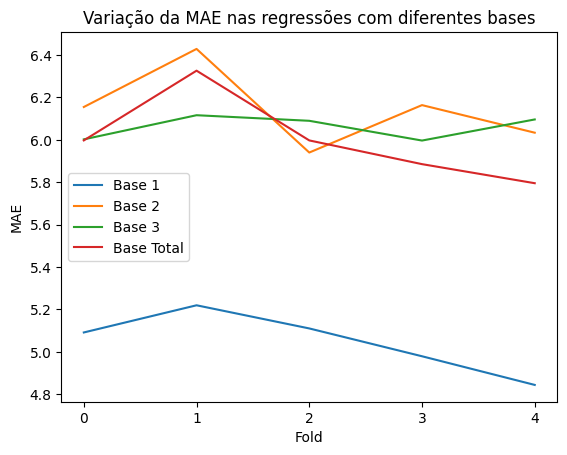

In [ ]:
# Grafico de Linhas usando o matplot
plt.plot(df_MAE['Fold'], df_MAE['Base 1'], label='Base 1')
plt.plot(df_MAE['Fold'], df_MAE['Base 2'], label='Base 2')
plt.plot(df_MAE['Fold'], df_MAE['Base 3'], label='Base 3')
plt.plot(df_MAE['Fold'], df_MAE['Base Total'], label='Base Total')

plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()
plt.title('Variação da MAE nas regressões com diferentes bases')

Nota-se que as menores MAE são obtidas na regressão realizada com a base 1 de dados.

###**Hipóteses e Busca por Exceções**


Hipótese: Cidades com menos população e com os menores pib tem os menores SNIS_PESGOTO (Percentual da população urbana residente em domicílios ligados à rede de esgotamento sanitário). Essa verdade se repete para TMI (essas cidades tem as maiores TMI)


Para fazer essa análise, vamos pegar apenas cidades que não possuem dados faltantes na base original, ou seja, que não tiveram nenhuma métrica estimada pelo presente trabalho

Também foi optado por analisar as TMI acima e abaixo da média pois foi observado que as cidades com pequenas populações (abaixo do 3Q) e com altas TMI (acima do 3Q) possuem dados faltantes ao longo dos anos.

In [ ]:
df_cidades = data_city.loc[:, ['ANO','NOME', 'SNIS_PESGOTO','REN_PIBPC_D','POP_TOT', 'TXMOINF']]
df_cidades = df_cidades.dropna()

df_hipotese = df_cidades.sort_values(['POP_TOT', 'REN_PIBPC_D'], ascending=[True, True])

df_menores_1 = df_hipotese.head(20)

df = pd.DataFrame(df_menores_1['NOME'])
df['SNIS_PESGOTO'] = df_menores_1['SNIS_PESGOTO']
df['TMI_'] = df_menores_1['TXMOINF']

df['Status_PESGOTO'] = np.where(df_menores_1['SNIS_PESGOTO'] <= 69, 'Abaixo da média', 'Acima da média')
df['Status_TMI'] = np.where(df_menores_1['TXMOINF'] >= 11.8 , 'Acima da média', 'Abaixo da média')

df

,NOME,SNIS_PESGOTO,TMI_,Status_PESGOTO,Status_TMI
10762,Araguainha,17.19,125.000000,Abaixo da média,Acima da média
5192,Araguainha,17.01,0.000000,Abaixo da média,Abaixo da média
8074,Doresópolis,93.36,71.428571,Acima da média,Acima da média
13644,Doresópolis,92.96,0.000000,Acima da média,Abaixo da média
19214,Doresópolis,92.50,0.000000,Acima da média,Abaixo da média
22249,São João da Paraúna,99.75,50.000000,Acima da média,Acima da média
20504,Santana da Ponte Pensa,100.00,0.000000,Acima da média,Abaixo da média
14934,Santana da Ponte Pensa,100.00,111.111111,Acima da média,Acima da média
10641,Tupanci do Sul,98.95,0.000000,Acima da média,Abaixo da média
16679,São João da Paraúna,100.00,0.000000,Acima da média,Abaixo da média


Note que não necessariamente, as cidades com menores populações e com menores PIB tem menos residencias com esgoto tratado. Portanto a hipótese não é válida.

Diante disso, vamos pegar uma única amostra cuja a hipótese é valida e analisar mais a fundo e buscar novas informações. Nesse caso, escolhemos a cidade Santiago do Sul que tem uma TMI acima do 3Q e um SNIS_PESGOTO abaixo do 1Q

In [ ]:
Rancho = df_cidades[df_cidades['NOME'] == 'Rancho Queimado']
Rancho

,ANO,NOME,SNIS_PESGOTO,REN_PIBPC_D,POP_TOT,TXMOINF
4523,2013,Rancho Queimado,57.57,27.16,2827,83.333333
10093,2014,Rancho Queimado,58.41,25.52,2838,80.000000
15663,2015,Rancho Queimado,59.69,25.91,2849,33.333333
21233,2016,Rancho Queimado,63.37,24.87,2860,33.333333


Text(0.5, 1.0, 'TMI por ano de Rancho Queimado')

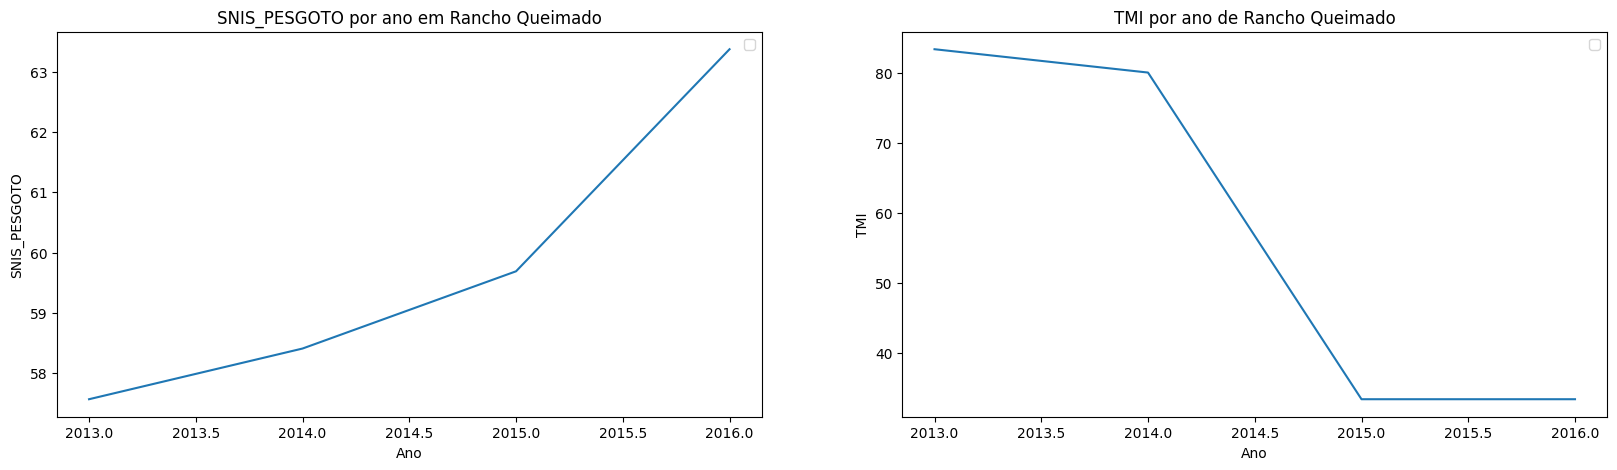

In [ ]:
# Plotando o gráfico de linha

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(Rancho['ANO'],Rancho['SNIS_PESGOTO'])
plt.xlabel('Ano')
plt.ylabel('SNIS_PESGOTO')
plt.legend()
plt.title('SNIS_PESGOTO por ano em Rancho Queimado')


plt.subplot(1,2,2)
plt.plot(Rancho['ANO'],Rancho['TXMOINF'])
plt.xlabel('Ano')
plt.ylabel('TMI')
plt.legend()
plt.title('SNIS_PESGOTO por ano em Rancho Queimado')

plt.title('TMI por ano de Rancho Queimado')




Note que ao longo do tempo, o percentual de residencias com esgoto tratado aumentou e a taxa de mortalidade infantil diminuiiu.

## Clusterização - Base 1

Vamos fazer a clusterização usando variáveis de saneamento básico e, com os grupos criados, podemos entender como a TMI se comporta nesses grupos

In [ ]:
#Copia do dataframe sem a coluna de nome
df_data_city = data_city_1.drop('NOME', axis=1)
cluster_data = df_data_city.loc[:, ['PDEFSAN', 'PINTERDRSAI', 'REN_PIBPC_D', 'PDEFAGUA']]

In [ ]:
cluster_data = cluster_data.values

kmeans = KMeans(n_clusters=4)

# Treinamento
kmeans.fit(cluster_data)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Imprime os centróides e os clusters
for i in range(4):
    print("Cluster", i+1)
    cluster_points = cluster_data[labels == i]
    print("Pontos:", cluster_points)
    print("Centróide:", centroids[i])
    print()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1
Pontos: [[ 4.51        2.74348422 12.12        8.71      ]
 [11.34        3.44311377 14.06       18.14      ]
 [ 6.72        0.9557945  10.78       14.59      ]
 ...
 [ 1.26        1.17948718 12.63        4.25      ]
 [ 5.21        2.38095238 22.92       17.41      ]
 [ 3.21        5.55555556 22.86       17.82      ]]
Centróide: [ 3.04361235  2.29753019 19.7284003  10.19865699]

Cluster 2
Pontos: [[30.44        8.77306572  6.79       43.35      ]
 [31.03        6.67408231  6.5        43.78      ]
 [30.93        5.42686962  6.25       44.04      ]
 ...
 [34.39        7.109375    5.8        54.91      ]
 [34.4        16.34182909  6.14       53.18      ]
 [49.22        4.43131462  4.1        52.92      ]]
Centróide: [38.07825545  5.01565052  8.12084112 59.85325545]

Cluster 3
Pontos: [[2.27000000e+00 2.02839757e-01 6.71400000e+01 3.65300000e+01]
 [2.36000000e+00 2.32018561e-01 7.21400000e+01 3.89800000e+01]
 [1.79000000e+00 0.00000000e+00 6.59900000e+01 3.92400000e+01]
 [3.69000

In [ ]:
#Adicionando a legenda dos clusteres na base de dados
data_city_1['Cluster'] = labels

In [ ]:
#Separando a base em clusters
cluster_1 = data_city_1[data_city_1['Cluster'] == 0]
cluster_2 = data_city_1[data_city_1['Cluster'] == 1]
cluster_3 = data_city_1[data_city_1['Cluster'] == 2]
cluster_4 = data_city_1[data_city_1['Cluster'] == 3]

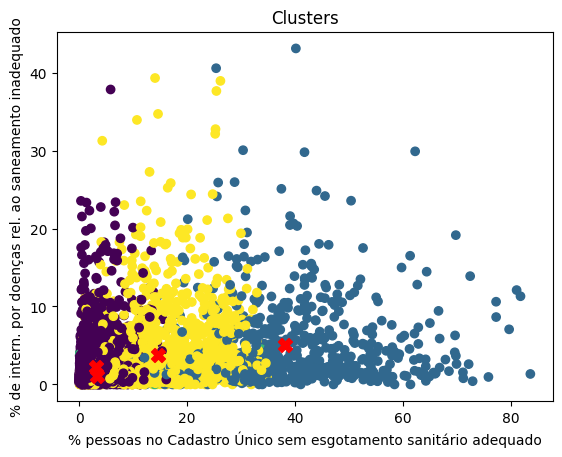

In [ ]:
# Plotar os pontos de dados coloridos por cluster
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=labels, cmap='viridis')

# Plotar os centroides dos clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', color='red', s=100)

# Configurações do gráfico
plt.xlabel('% pessoas no Cadastro Único sem esgotamento sanitário adequado')
plt.ylabel('% de intern. por doenças rel. ao saneamento inadequado')
plt.title('Clusters')

# Exibir o gráfico
plt.show()

Vamos analisar a TMI de cada cluster

Vamos calcular a média da TMI por ano de cada cluster

In [ ]:
#Separando a base em clusters

media_cluster1 = pd.DataFrame(cluster_1.groupby('ANO')['TXMOINF'].mean())
media_cluster2 = pd.DataFrame(cluster_2.groupby('ANO')['TXMOINF'].mean())
media_cluster3 = pd.DataFrame(cluster_3.groupby('ANO')['TXMOINF'].mean())
media_cluster4 = pd.DataFrame(cluster_4.groupby('ANO')['TXMOINF'].mean())


media_cluster1['Esgoto Tratado'] = cluster_1.groupby('ANO')['SNIS_PESGOTO'].mean()
media_cluster2['Esgoto Tratado'] = cluster_2.groupby('ANO')['SNIS_PESGOTO'].mean()
media_cluster3['Esgoto Tratado'] = cluster_3.groupby('ANO')['SNIS_PESGOTO'].mean()
media_cluster4['Esgoto Tratado'] = cluster_4.groupby('ANO')['SNIS_PESGOTO'].mean()


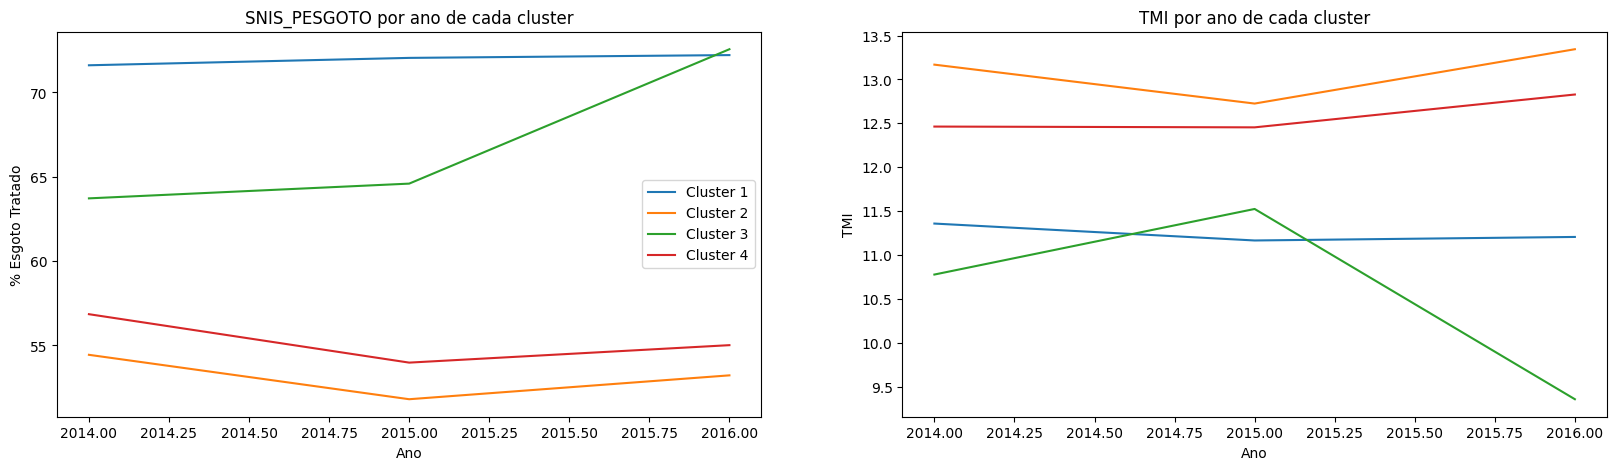

In [ ]:
# Plotando o gráfico de linha

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(media_cluster1['Esgoto Tratado'], label='Cluster 1')
plt.plot(media_cluster2['Esgoto Tratado'], label='Cluster 2')
plt.plot(media_cluster3['Esgoto Tratado'], label='Cluster 3')
plt.plot(media_cluster4['Esgoto Tratado'], label='Cluster 4')
plt.xlabel('Ano')
plt.ylabel('% Esgoto Tratado')
plt.legend()
plt.title('SNIS_PESGOTO por ano de cada cluster')


plt.subplot(1,2,2)
plt.plot(media_cluster1['TXMOINF'], label='Cluster 1')
plt.plot(media_cluster2['TXMOINF'], label='Cluster 2')
plt.plot(media_cluster3['TXMOINF'], label='Cluster 3')
plt.plot( media_cluster4['TXMOINF'], label='Cluster 4')
plt.xlabel('Ano')
plt.ylabel('TMI')
plt.title('TMI por ano de cada cluster');


É interessante notar que as cidades do cluster 2, em média, tem os menores percentuais de população urbana residente em domicílios ligados à rede de esgotamento sanitário e as maiores médias de TMI ao longo dos anos.

Ademais, nota-se que, no cluter 3, a partir de 2015 o SNIS_PESGOTO aumentou e a TMI diminuiu, o que pode indicar uma relação inversamente proporcional entre essas variáveis

Outro ponto interessante, é que não necessáriamente o cluster com maior percentual da população com acesso a rediencias com esgoto tratado é o cluster com as menores TMI.

##Plot da Comparação das Regressões

In [ ]:
data_city_1.shape

(4928, 13)

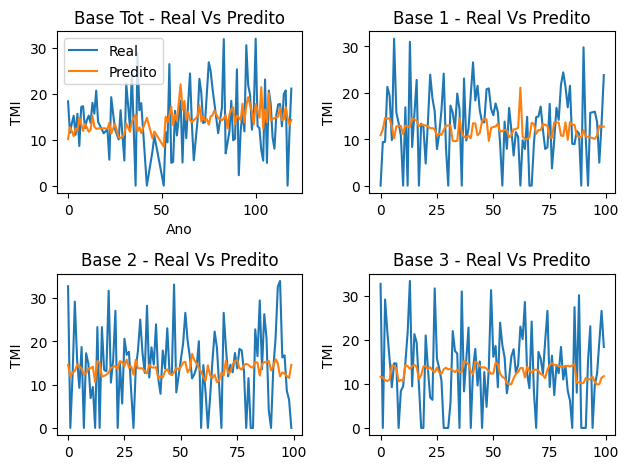

In [ ]:
predicao = data_city_.head(100)

plt.subplot(2,2,1)
plt.plot(predicao['TXMOINF'], label='Real')
plt.plot( predicao['TMI Pedita'], label='Predito')
plt.xlabel('Ano')
plt.ylabel('TMI')
plt.legend()
plt.title('Base Tot - Real Vs Predito')

predicao_1 = data_city_1.head(100)

plt.subplot(2,2,2)
plt.plot(range(100),predicao_1['TXMOINF'], label='Real')
plt.plot(range(100),predicao_1['TMI Pedita'], label='Predito')
plt.ylabel('TMI')
plt.title('Base 1 - Real Vs Predito')

predicao_2 = data_city_2.head(100)

plt.subplot(2,2,3)
plt.plot(range(100), predicao_2['TXMOINF'], label='Real')
plt.plot(range(100), predicao_2['TMI Pedita'], label='Predito')
plt.ylabel('TMI')
plt.title('Base 2 - Real Vs Predito')

predicao_3 = data_city_3.head(100)

plt.subplot(2,2,4)
plt.plot(range(100),predicao_3['TXMOINF'], label='Real')
plt.plot(range(100),predicao_3['TMI Pedita'], label='Predito')
plt.ylabel('TMI')
plt.title('Base 3 - Real Vs Predito')
plt.tight_layout()